# P1- Identificação de Arritmia cardíaca
Jean Carlos Mello Xavier Faria - 11259628

Primeiramente, vamos importar as bibliotecas que utilizaremos durante o programa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Vamos ler os arquivos de treino fornecidos.

In [2]:
ecg_treino = pd.read_pickle("ecg_treino.pickle")
rotulos_treino = pd.read_csv("rotulos_treino.csv")
n_rotulos_treino = pd.read_csv("n_rotulos_treino.csv") 

Agora, vamos visualizar os dados. Primeiramente, vamos verificar o ecg_treino.

In [3]:
ecg_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,649990,649991,649992,649993,649994,649995,649996,649997,649998,649999
0,Paciente101,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.345,-0.330,...,-0.300,-0.295,-0.285,-0.280,-0.285,-0.290,-0.295,-0.295,-0.290,0.00
1,Paciente106,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.310,-0.290,...,1.970,1.900,1.785,1.690,1.550,1.355,1.040,0.635,0.265,0.00
2,Paciente108,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.125,-0.135,...,-0.135,-0.110,-0.095,-0.110,-0.155,-0.165,-0.095,-0.010,0.040,0.00
3,Paciente109,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,0.175,...,-0.885,-0.885,-0.885,-0.875,-0.900,-0.900,-0.910,-0.920,-0.910,-1.28
4,Paciente112,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.760,-0.770,...,-0.940,-0.925,-0.915,-0.890,-0.885,-0.845,-0.820,-0.825,-0.810,-1.28


In [4]:
ecg_treino.shape

(22, 650001)

Vemos que temos 22 pacientes, e cada um contém 650001 valores que são os valores para o eletrocardiograma dele. Podemos plotar o dois primeiros batimentos do paciente zero, utilizando a biblioteca matplotlib.

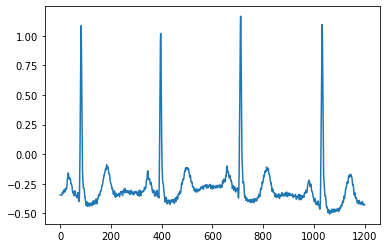

In [5]:
plt.plot(ecg_treino.iloc[0].drop('Unnamed: 0').to_numpy()[:1200])

Em n_rotulos_treino temos a posição de cada pico R do eletrocardiograma. Vamos verificar o conteúdo nele.

In [6]:
n_rotulos_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362
0,Paciente101,83,396,711,1032,1368,1712,2036,2349,2662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paciente106,351,724,1086,1448,1829,2197,2571,2918,3234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paciente108,88,442,789,1155,1493,1821,2157,2517,2889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paciente109,111,343,571,807,1048,1287,1523,1765,1994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paciente112,124,382,644,892,1149,1393,1648,1891,2147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
n_rotulos_treino.shape

(22, 3364)

Observando o caso do Paciente 101, podemos plotar junto ao seus dois primeiros batimentos, a posição de cada ponto R.

[(-0.5, 1.2)]

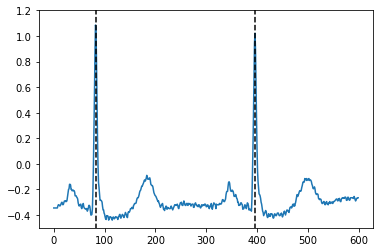

In [8]:
plt.figure()
ax = plt.subplot(1,1,1)
plt.plot(ecg_treino.iloc[0].drop('Unnamed: 0').to_numpy()[:600])
plt.plot([83, 83], [-0.8, 1.5], 'k--')
plt.plot([396, 396], [-0.8, 1.5], 'k--')
ax.set(ylim=(-0.5, 1.2))

Por fim, vamos verificar o último arquivo fornecido para o treinamento, rotulos_treino. Ele é a saída que desejamos obter com o modelo.

In [9]:
rotulos_treino.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362
0,Paciente101,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paciente106,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paciente108,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paciente109,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paciente112,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Utilizando o .head(), conseguimos verificar apenas os batimentos N (Normais) e diversos NaN. Para podermos ter uma ideia melhor do arquivo, vamos verificar a quantidade de batimentos N, S e V.

In [10]:
rotulos = rotulos_treino.iloc[: , 1:].to_numpy()
N = (rotulos=='N').sum()
S = (rotulos=='S').sum()
V = (rotulos=='V').sum()

print(f' N = {N} \n S = {S}\n V = {V}')

 N = 45866 
 S = 944
 V = 3788


# Pré-Processamento

In [104]:
dist_r = n_rotulos_treino.iloc[: , 1:].to_numpy()

num_lines = len(dist_r)
time = []
for line in range(num_lines):
    for column in range(len(dist_r[line]) - 1):
        if np.isnan(dist_r[line][column+1]) == False:
            time.append(dist_r[line][column+1] - dist_r[line][column])
        else:
            break
print(len(time))

50999


In [13]:
mean_rr = int(np.mean(time))
print('Média entre os pontors RR = {}'.format(mean_rr))

Média entre os pontors RR = 280


Com o resultado da média entre os pontos RR, vamos considerá-lo como o período de um batimento cardíaco. Portanto, vamos dividir o dataframe ecg_teste em uma matriz de numpy que cada linha vai representar o um batimento de um paciente. Como existem muitos dados faltantes, vamos pegar os 2000 primeiros batimentos de cada pessoa.

In [14]:
ecg = ecg_treino.iloc[: , 1:].to_numpy()
print(ecg.shape)

ecg_l = ecg[:,:1000*280]
batimentos = np.reshape(ecg_l, (-1,280))
print(batimentos.shape)

(22, 650000)
(22000, 280)


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(x)

NameError: name 'x' is not defined

Plotando a primeira linha da nossa matriz, temos o primeiro batimento do primeiro paciente.

In [107]:
plt.plot(X_train_norm[0][280])

IndexError: index 280 is out of bounds for axis 0 with size 280

In [ ]:
from scipy.fft import fft, fftfreq, fftshift
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_fft = fft(X_train)
# X_train_fft = scaler.fit_transform(np.abs(X_train_fft))

In [ ]:
# # number of signal points
# N = 280
# # sample spacing
# T = 1.0 / 360.0
# yf = fft(X_train)
# xf = fftfreq(N, T)
# xf = fftshift(xf)
# yplot = fftshift(yf[0])
# plt.plot(xf, 1.0/N * np.abs(yplot))
# plt.grid()

np.fft.fft()
plt.show()

Vamos realizar algo parecido com os rótulos. Criaremos uma matriz.

In [17]:
rotulos = rotulos[:, :1000]
Y_train = np.reshape(rotulos, (-1, 1))
print(Y_train.shape)

(22000, 1)


In [18]:
N = (Y_train=='N').sum()
S = (Y_train=='S').sum()
V = (Y_train=='V').sum()
print(f' N = {N} \n S = {S}\n V = {V}')

 N = 20067 
 S = 328
 V = 1448


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y_train)

for i in range(len(integer_encoded)):
    if integer_encoded[i] != 1:
        integer_encoded[i] = 0

C:\Users\jean_\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
df_train = pd.DataFrame(X_train_norm)
# df_train = pd.DataFrame(X_train_norm)
df_train.shape

(22000, 280)

In [21]:
df_rotulo = pd.DataFrame(integer_encoded, columns=['Rotulos'])
df_rotulo.head()
df_rotulo.shape

(22000, 1)

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(df_train, df_rotulo)

In [23]:
print(y.shape)

(30099, 1)


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train.values.reshape(-1))

d = {c: w for c, w in zip(np.unique(y), class_weights)}

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv1D
from keras.initializers import HeUniform
from keras.optimizers import SGD
from keras.layers import Dropout

initializer = HeUniform() 
model = Sequential()
sgd = SGD(learning_rate=0.0001, momentum=0.8, nesterov=True)

# model.add(Conv1D(20, (28), input_shape=(840,1), activation="ReLU", kernel_initializer=initializer))
# model.add(Dropout(0.2))
# model.add(Conv1D(20,(28), activation="ReLU"))
# model.add(Dropout(0.2))

model.add(Dense(32, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(rate=0.25))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"] )

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, batch_size=32, verbose=1)

In [99]:
from keras.models import Sequential
from keras.layers import Dense,Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from keras.initializers import HeUniform
from keras.layers import Dropout

def create_baseline():
	# create model
    initializer = HeUniform() 
#     sgd = SGD(learning_rate=0.0001, momentum=0.8, nesterov=True)
    model = Sequential()
    model.add(Dense(280, input_dim=280, activation='relu', kernel_initializer=initializer))
    model.add(Dropout(rate=0.25))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=100, verbose=1)

C:\Users\jean_\AppData\Local\Temp\ipykernel_1136\1807743218.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=100, verbose=1)


In [100]:
history = estimator.fit(X_train, y_train,  validation_data=(X_test,y_test))

Epoch 1/300
202/202 [==============================] - 2s 7ms/step - loss: 0.6556 - accuracy: 0.6583 - val_loss: 0.6377 - val_accuracy: 0.6678
Epoch 2/300
202/202 [==============================] - 1s 6ms/step - loss: 0.6353 - accuracy: 0.6664 - val_loss: 0.6221 - val_accuracy: 0.6723
Epoch 3/300
202/202 [==============================] - 1s 6ms/step - loss: 0.6216 - accuracy: 0.6710 - val_loss: 0.5994 - val_accuracy: 0.6901
Epoch 4/300
202/202 [==============================] - 1s 6ms/step - loss: 0.6092 - accuracy: 0.6822 - val_loss: 0.5890 - val_accuracy: 0.6986
Epoch 5/300
202/202 [==============================] - 1s 5ms/step - loss: 0.5986 - accuracy: 0.6886 - val_loss: 0.5781 - val_accuracy: 0.6989
Epoch 6/300
202/202 [==============================] - 1s 6ms/step - loss: 0.5901 - accuracy: 0.6940 - val_loss: 0.5731 - val_accuracy: 0.7055
Epoch 7/300
202/202 [==============================] - 1s 6ms/step - loss: 0.5783 - accuracy: 0.7005 - val_loss: 0.5597 - val_accuracy: 0.7121

Epoch 58/300
202/202 [==============================] - 1s 6ms/step - loss: 0.4110 - accuracy: 0.8147 - val_loss: 0.4292 - val_accuracy: 0.8051
Epoch 59/300
202/202 [==============================] - 1s 6ms/step - loss: 0.4105 - accuracy: 0.8103 - val_loss: 0.4265 - val_accuracy: 0.8074
Epoch 60/300
202/202 [==============================] - 1s 6ms/step - loss: 0.4078 - accuracy: 0.8161 - val_loss: 0.4275 - val_accuracy: 0.8030
Epoch 61/300
202/202 [==============================] - 1s 6ms/step - loss: 0.4047 - accuracy: 0.8161 - val_loss: 0.4264 - val_accuracy: 0.8056
Epoch 62/300
202/202 [==============================] - 1s 6ms/step - loss: 0.4026 - accuracy: 0.8181 - val_loss: 0.4271 - val_accuracy: 0.8101
Epoch 63/300
202/202 [==============================] - 1s 7ms/step - loss: 0.4021 - accuracy: 0.8169 - val_loss: 0.4202 - val_accuracy: 0.8125
Epoch 64/300
202/202 [==============================] - 1s 6ms/step - loss: 0.4043 - accuracy: 0.8140 - val_loss: 0.4197 - val_accuracy:

Epoch 115/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3592 - accuracy: 0.8414 - val_loss: 0.4120 - val_accuracy: 0.8257
Epoch 116/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3674 - accuracy: 0.8346 - val_loss: 0.4013 - val_accuracy: 0.8288
Epoch 117/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3562 - accuracy: 0.8427 - val_loss: 0.3979 - val_accuracy: 0.8269
Epoch 118/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3661 - accuracy: 0.8358 - val_loss: 0.4000 - val_accuracy: 0.8219
Epoch 119/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3584 - accuracy: 0.8382 - val_loss: 0.4045 - val_accuracy: 0.8270
Epoch 120/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3552 - accuracy: 0.8391 - val_loss: 0.4040 - val_accuracy: 0.8300
Epoch 121/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3587 - accuracy: 0.8413 - val_loss: 0.4031 - val_ac

202/202 [==============================] - 1s 6ms/step - loss: 0.3416 - accuracy: 0.8491 - val_loss: 0.4000 - val_accuracy: 0.8314
Epoch 172/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3393 - accuracy: 0.8502 - val_loss: 0.3997 - val_accuracy: 0.8289
Epoch 173/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3432 - accuracy: 0.8480 - val_loss: 0.3976 - val_accuracy: 0.8295
Epoch 174/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3369 - accuracy: 0.8494 - val_loss: 0.4051 - val_accuracy: 0.8311
Epoch 175/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3415 - accuracy: 0.8483 - val_loss: 0.3944 - val_accuracy: 0.8309
Epoch 176/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3366 - accuracy: 0.8515 - val_loss: 0.3934 - val_accuracy: 0.8270
Epoch 177/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3391 - accuracy: 0.8506 - val_loss: 0.3891 - val_accuracy: 0.8340

202/202 [==============================] - 1s 5ms/step - loss: 0.3302 - accuracy: 0.8549 - val_loss: 0.3942 - val_accuracy: 0.8275
Epoch 228/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3246 - accuracy: 0.8562 - val_loss: 0.4023 - val_accuracy: 0.8327
Epoch 229/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3292 - accuracy: 0.8505 - val_loss: 0.4077 - val_accuracy: 0.8341
Epoch 230/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3257 - accuracy: 0.8547 - val_loss: 0.3915 - val_accuracy: 0.8374
Epoch 231/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3235 - accuracy: 0.8571 - val_loss: 0.4037 - val_accuracy: 0.8308
Epoch 232/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3251 - accuracy: 0.8521 - val_loss: 0.3985 - val_accuracy: 0.8321
Epoch 233/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3254 - accuracy: 0.8536 - val_loss: 0.3895 - val_accuracy: 0.8369

202/202 [==============================] - 1s 6ms/step - loss: 0.3140 - accuracy: 0.8627 - val_loss: 0.3991 - val_accuracy: 0.8380
Epoch 284/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3186 - accuracy: 0.8584 - val_loss: 0.3881 - val_accuracy: 0.8294
Epoch 285/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3181 - accuracy: 0.8588 - val_loss: 0.3891 - val_accuracy: 0.8327
Epoch 286/300
202/202 [==============================] - 1s 5ms/step - loss: 0.3108 - accuracy: 0.8616 - val_loss: 0.3902 - val_accuracy: 0.8384
Epoch 287/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3104 - accuracy: 0.8612 - val_loss: 0.3858 - val_accuracy: 0.8368
Epoch 288/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3106 - accuracy: 0.8610 - val_loss: 0.3961 - val_accuracy: 0.8355
Epoch 289/300
202/202 [==============================] - 1s 6ms/step - loss: 0.3138 - accuracy: 0.8612 - val_loss: 0.4014 - val_accuracy: 0.8381

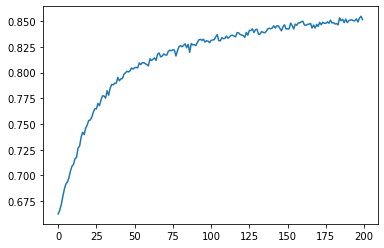

In [96]:
plt.plot(history.history['accuracy'])

In [35]:
ecg_teste = pd.read_pickle("ecg_teste.pickle")
rotulos_teste = pd.read_csv("rotulos_teste.csv")
n_rotulos_teste = pd.read_csv("n_rotulos_teste.csv")

In [36]:
rotulos_teste.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3241,3242,3243,3244,3245,3246,3247,3248,3249,3250
0,Paciente100,N,N,N,N,N,N,N,S,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paciente103,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Paciente105,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Paciente111,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Paciente113,N,N,N,N,N,N,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ecg = ecg_teste.iloc[: , 1:].to_numpy()
batimentos_teste = ecg[:,:2000*280]
X_teste = np.reshape(batimentos_teste, (-1,280))

In [38]:
X_teste_norm = scaler.transform(X_teste)

In [ ]:
X_teste_fft = fft(X_teste)
X_teste_fft = scaler.fit_transform(np.abs(X_teste_fft))

In [39]:
rotulos_test = rotulos_teste.iloc[: , 1:].to_numpy()

rotulos_test = rotulos_test[:, :2000]
Y_teste = np.reshape(rotulos_test, (-1, 1))
print(Y_teste.shape)

(44000, 1)


In [40]:
# integer encode
label_encoder = LabelEncoder()
teste_encoded = label_encoder.fit_transform(Y_teste)

for i in range(len(teste_encoded)):
    if teste_encoded[i] != 1:
        teste_encoded[i] = 0

C:\Users\jean_\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
df_teste = pd.DataFrame(X_teste_norm)
df_rotulo_teste = pd.DataFrame(teste_encoded, columns=['Rotulos'])
df_rotulo_teste.shape

(44000, 1)

In [101]:
# accuracy = estimator.evaluate(df_teste, df_rotulo_teste)
= SVC(random_state=0)
y_valid = estimator.predict(df_teste, verbose=1)
# print("Model accuracy: %.2f"% (accuracy[1]*100))

1375/1375 [==============================] - 2s 1ms/step


In [102]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

# matrix_confusion = confusion_matrix(teste_encoded[0], y_valid)
print(matrix_confusion)
print(classification_report(teste_encoded,y_valid))

[[ 1161  5363]
 [ 5525 31951]]
              precision    recall  f1-score   support

           0       0.18      0.20      0.19      6524
           1       0.86      0.84      0.85     37476

    accuracy                           0.75     44000
   macro avg       0.52      0.52      0.52     44000
weighted avg       0.76      0.75      0.75     44000



# Classificador multiclasse

Primeiramente, vamos criar a matriz de rótulo com 3 colunas, uma para cada classe.

In [109]:
from sklearn import preprocessing

encode = preprocessing.LabelEncoder()
integer = encode.fit_transform(Y_train)
keys = encode.classes_
values = encode.transform(encode.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'F': 0, 'N': 1, 'Q': 2, 'S': 3, 'V': 4}


C:\Users\jean_\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
for value in integer:
    if value == 1:
        np.append(N, value)
    elif value == 3:
        

In [60]:
print(teste_encoded.shape)

(44000,)


In [61]:
print(y_valid.shape[0])

44000


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

def create_baseline():
	# create model
    initializer = HeUniform() 
    model = Sequential()
    model.add(Dense(280, input_dim=280, activation='relu', kernel_initializer=initializer))
    model.add(Dropout(rate=0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(3, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=100, verbose=0)